In [60]:
# importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import label_binarize

In [2]:
# load dataset
df = pd.read_csv('C:/Documents/Files/classification_dataset.csv')

In [3]:
# View first rows
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1.320352,-2.567934,-4.282360,-6.915233,-0.252473,-0.005385,-18.345865,-0.930923,-2.507959,0.175361,...,-4.881640,-5.240461,-3.367671,4.512292,-0.298215,10.329481,-1.552004,-4.800611,7.309212,2
1,-0.266474,-1.671642,-4.803748,8.245065,2.853301,1.785081,-5.618029,-3.721360,-0.380079,2.775803,...,3.140780,1.977913,1.137641,1.107803,-2.293338,-5.761284,-4.651575,-2.959305,-2.734422,3
2,-0.453167,0.684989,0.753963,-4.412206,-0.753737,2.823644,-0.788450,2.402972,-4.723590,3.578492,...,-5.013055,-2.345037,2.196663,0.501761,0.275463,6.046973,0.888220,-4.977081,8.627480,4
3,2.235536,-1.155887,-5.386474,2.658979,-3.389110,-3.154788,-9.101348,1.286173,-1.703711,0.827046,...,11.762025,-5.144721,0.400783,4.479569,-0.263919,8.361919,-1.677097,2.312301,1.013515,2
4,-2.062500,1.275998,-3.693180,5.078314,-3.168421,3.896057,-1.681356,-3.102720,-0.952897,-3.749962,...,-2.106217,-1.990492,1.118937,0.937920,-0.727366,0.153318,1.554638,1.710242,-8.808735,4


In [6]:
# View shape
df.shape

(1000, 21)

In [8]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

In [13]:
# view describtion
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.427971,0.081897,-0.406122,-0.602971,-0.377251,0.277509,0.321120,-0.095894,0.588244,0.339964,...,-0.303803,0.330920,-0.209759,-0.003338,0.222955,-0.339922,-0.561833,0.170053,-0.076791,1.999000
std,2.452289,2.455722,2.408996,5.628962,2.501275,2.496263,4.760954,2.509549,2.384343,2.354521,...,6.364069,2.454759,2.406635,2.401802,2.277398,4.505005,2.374679,2.628312,5.199505,1.411734
min,-8.304990,-7.720221,-8.630486,-20.310626,-7.323385,-8.036351,-18.345865,-8.027739,-6.139015,-7.330789,...,-20.602504,-7.408738,-7.826549,-8.214253,-6.736505,-15.735139,-10.596158,-8.824814,-20.961391,0.000000
25%,-2.084659,-1.645578,-1.915674,-4.431044,-2.019384,-1.547985,-2.688382,-1.824100,-1.007947,-1.208119,...,-4.726572,-1.303000,-1.925195,-1.564949,-1.346883,-3.220202,-2.076673,-1.528553,-3.342652,1.000000
50%,-0.287400,0.120076,-0.318551,-0.594443,-0.371413,0.258575,0.405343,-0.005203,0.522878,0.321791,...,-0.353349,0.344886,-0.025167,-0.060254,0.316816,-0.253482,-0.515832,0.162719,-0.201640,2.000000
75%,1.243896,1.764226,1.249063,3.208543,1.234957,1.956869,3.382488,1.549881,2.172100,1.936714,...,4.117299,2.030383,1.523738,1.617747,1.801596,2.469850,0.984786,2.057189,3.216400,3.000000
max,8.705833,9.143391,6.465264,16.753341,7.965403,8.738586,15.986937,8.290832,8.657538,8.284052,...,21.774493,8.963339,8.136781,8.416615,9.856091,14.716184,6.617556,8.442957,17.467222,4.000000


In [12]:
# checking null values
df.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
target        0
dtype: int64

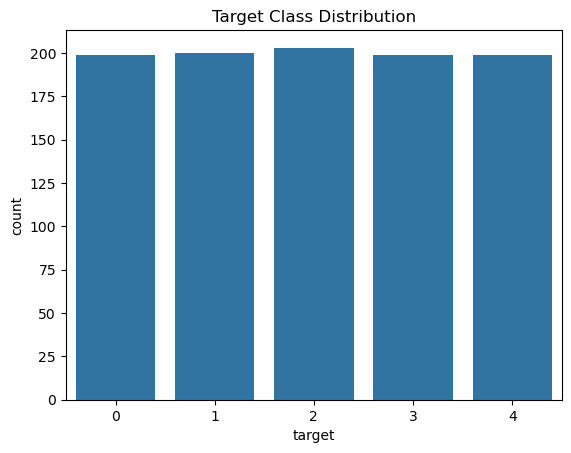

In [4]:
# Target Class Distribution
sns.countplot(x=df['target'])
plt.title('Target Class Distribution')
plt.show()

In [10]:
# unique
df['target'].unique()

array([2, 3, 4, 1, 0], dtype=int64)

In [11]:
# counts
df['target'].value_counts()

target
2    203
1    200
3    199
4    199
0    199
Name: count, dtype: int64

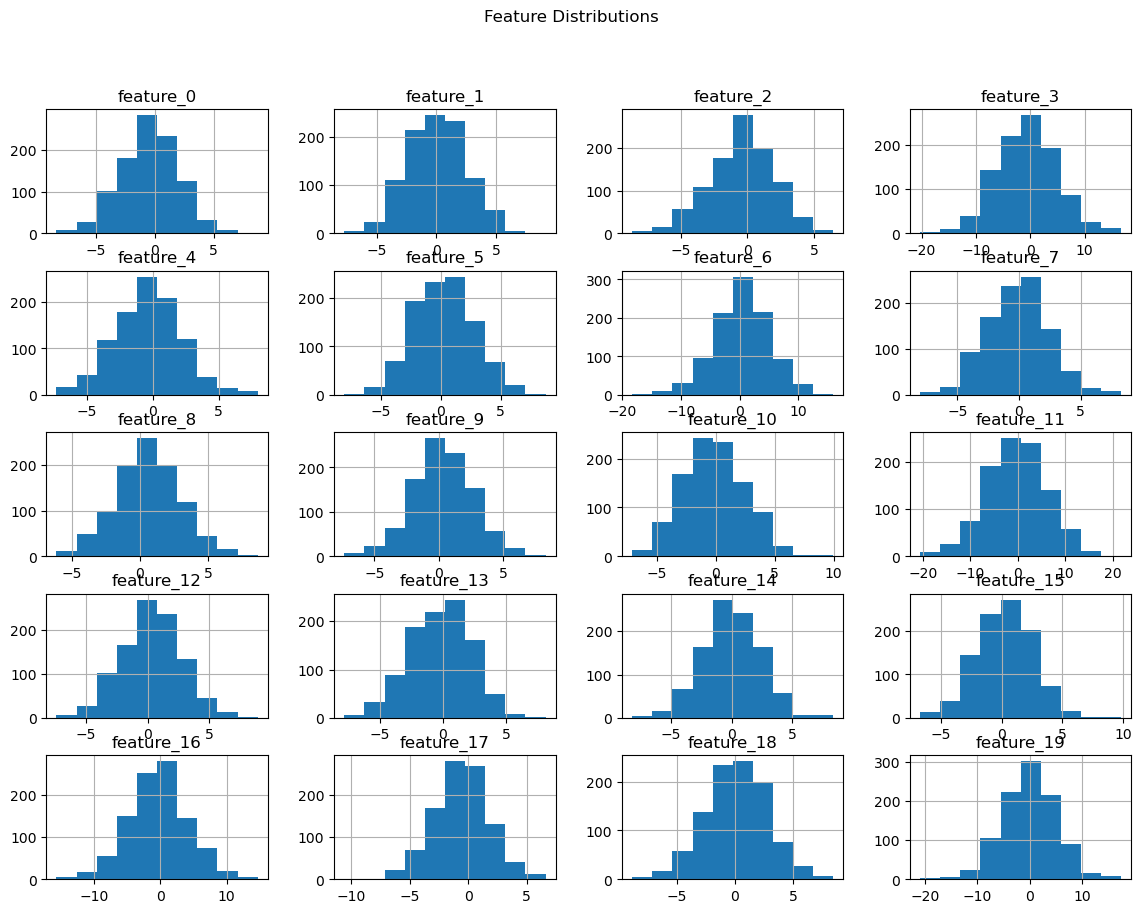

In [5]:
# Feature Distribution
df.drop('target', axis=1).hist(figsize=(14,10))
plt.suptitle('Feature Distributions')
plt.show()

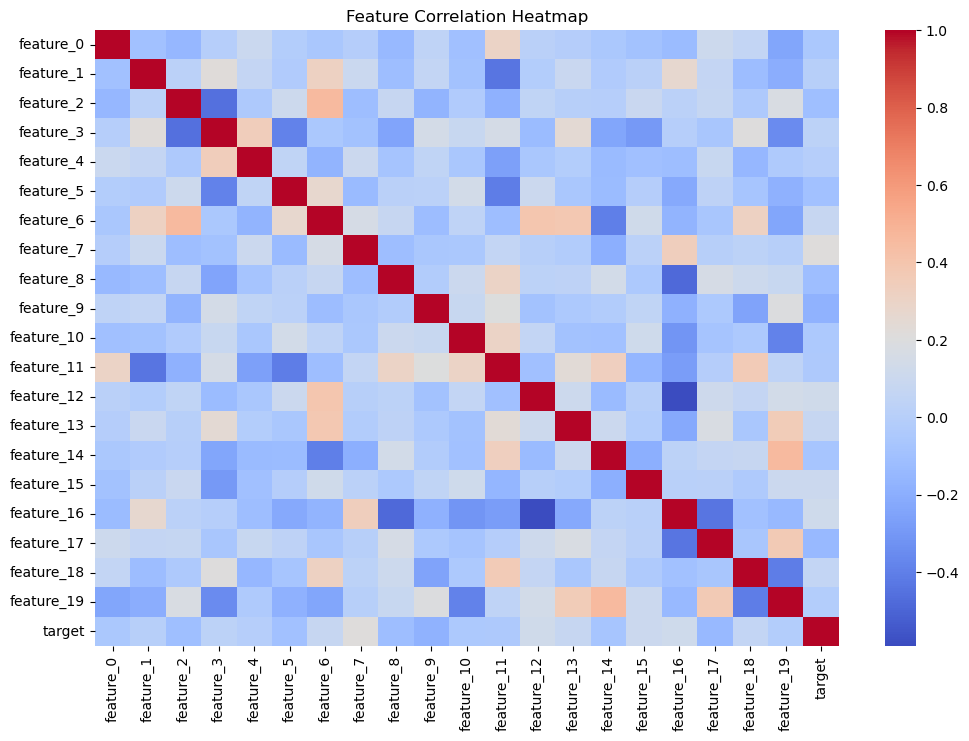

In [6]:
# Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# identifying outliers
def box_plot_all(df):
    numeric_df = df.select_dtypes(include='float64')  # only numeric columns
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=numeric_df)
    plt.title('Box Plot')
    plt.xticks(rotation=45)
    plt.show()

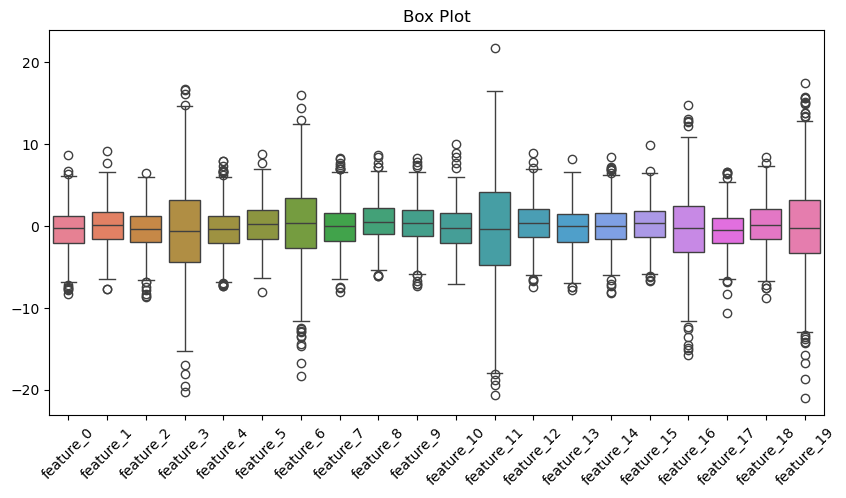

In [8]:
box_plot_all(df)

In [9]:
# iqr treatment
df_clean = df.copy()
feature_cols = [c for c in df.columns if c != "target"]

for col in feature_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower, upper)


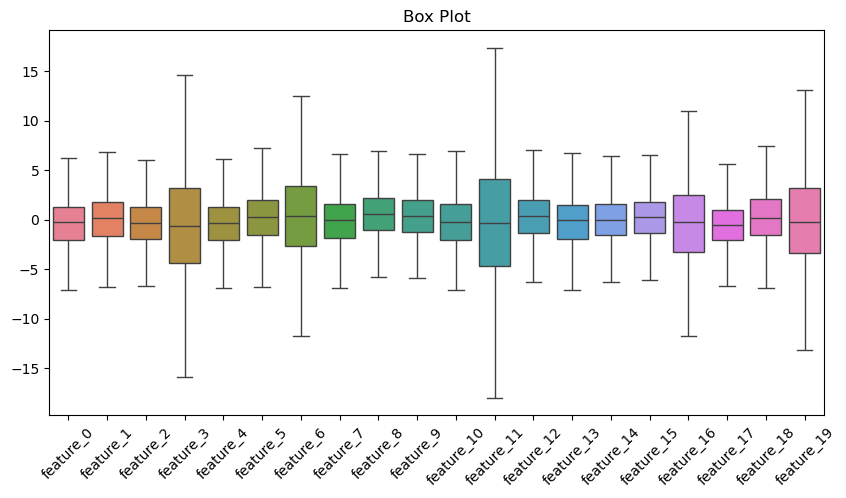

In [10]:
box_plot_all(df_clean)

In [23]:
# correlation from top to bottom
corr = df_clean.corr(numeric_only=True)["target"].drop("target").sort_values(ascending=False)
print("\nTop 10 correlations with target:")
print(corr)


Top 10 correlations with target:
feature_7     0.215375
feature_12    0.127892
feature_16    0.124029
feature_15    0.104303
feature_6     0.078441
feature_13    0.075819
feature_18    0.057881
feature_3     0.025627
feature_1     0.001669
feature_4    -0.005643
feature_19   -0.013077
feature_11   -0.042722
feature_0    -0.049860
feature_10   -0.050793
feature_14   -0.070240
feature_5    -0.095915
feature_2    -0.109780
feature_8    -0.116761
feature_17   -0.141896
feature_9    -0.177244
Name: target, dtype: float64


In [11]:
# Feature & Target Separation
X = df_clean[feature_cols]
y = df_clean["target"]

In [17]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print("\nTrain / Test shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Train / Test shapes:
X_train: (800, 20) X_test: (200, 20)


In [20]:
# Model Implementations
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

In [26]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [45]:
# Support Vector Machine (SVM)
svm = SVC(C=10, gamma='scale', kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [46]:
# Model Evaluation
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1_weighted': f1_score(y_true, y_pred, average='weighted')
    }

results = pd.DataFrame({
    'Logistic': evaluate_model(y_test, y_pred_log),
    'SVM': evaluate_model(y_test, y_pred_svm),
    'RandomForest': evaluate_model(y_test, y_pred_rf)
})

print(results)


             Logistic       SVM  RandomForest
Accuracy     0.545000  0.695000      0.660000
F1_weighted  0.538799  0.696425      0.659023


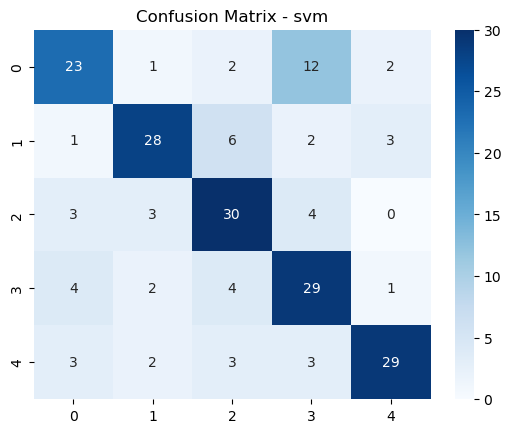

              precision    recall  f1-score   support

           0       0.71      0.55      0.62        40
           1       0.68      0.62      0.65        40
           2       0.63      0.78      0.70        40
           3       0.57      0.62      0.60        40
           4       0.74      0.72      0.73        40

    accuracy                           0.66       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.67      0.66      0.66       200



In [47]:
# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - svm')
plt.show()


print(classification_report(y_test, y_pred_rf))

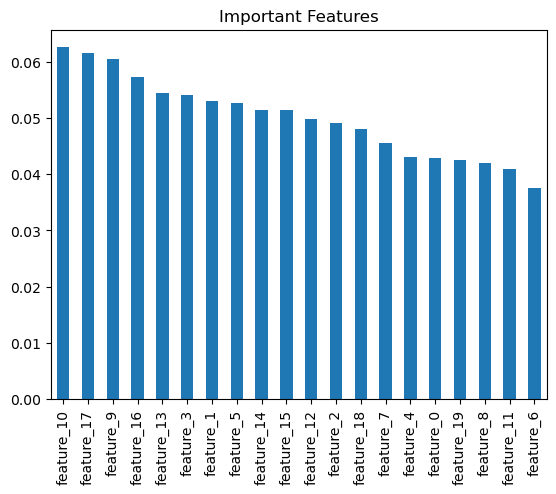

In [50]:
# Feature Importance (Random Forest)
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Important Features')
plt.show()

In [49]:
# Hyperparameter Tuning (GridSearchCV)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    scoring='f1_weighted',
    cv=5
)

grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_

print("Best SVM Parameters:", grid_svm.best_params_)

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [52]:
# Create Linear and RBF SVM models
linear_svm = SVC(kernel="linear", C=1.0, random_state=42)
rbf_svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

# Measure training time
t0 = time.time()
linear_svm.fit(X_train_scaled, y_train)
t_linear_train = time.time() - t0

t0 = time.time()
rbf_svm.fit(X_train_scaled, y_train)
t_rbf_train = time.time() - t0

print(f"Training time → Linear: {t_linear_train:.4f}s, RBF: {t_rbf_train:.4f}s")

# Function to measure average prediction time
def avg_pred_time(model, X, n=50):  # n=50 predictions
    times = []
    for _ in range(n):
        t0 = time.time()
        _ = model.predict(X)
        times.append(time.time() - t0)
    return np.mean(times)

t_linear_pred = avg_pred_time(linear_svm, X_test_scaled)
t_rbf_pred = avg_pred_time(rbf_svm, X_test_scaled)

print(f"Prediction time → Linear: {t_linear_pred:.6f}s, RBF: {t_rbf_pred:.6f}s")
print(f"RBF is {t_rbf_pred / t_linear_pred:.2f}x slower than Linear")

Training time → Linear: 0.0465s, RBF: 0.0390s
Prediction time → Linear: 0.003051s, RBF: 0.010531s
RBF is 3.45x slower than Linear


In [53]:
# overfitting analysis
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import numpy as np

RANDOM_STATE = 42

for C_val in [0.1, 1, 10, 100]:
    model = SVC(kernel="rbf", C=C_val, gamma="scale", random_state=RANDOM_STATE)
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train,
        cv=3, train_sizes=np.linspace(0.1, 1.0, 5),
        scoring="accuracy", n_jobs=-1
    )
    
    train_acc = train_scores.mean(axis=1)[-1]
    val_acc = val_scores.mean(axis=1)[-1]
    gap = train_acc - val_acc
    
    print(f"\nC={C_val}: train={train_acc:.4f}, val={val_acc:.4f}, gap={gap:.4f}")
    
    if train_acc < 0.65 and val_acc < 0.65:
        print("UNDERFITTING")
    elif gap > 0.15:
        print("OVERFITTING")
    else:
        print("BALANCED")



C=0.1: train=0.7217, val=0.6525, gap=0.0692
BALANCED

C=1: train=0.9212, val=0.7587, gap=0.1625
OVERFITTING

C=10: train=0.9994, val=0.7562, gap=0.2432
OVERFITTING

C=100: train=1.0000, val=0.7612, gap=0.2388
OVERFITTING


In [54]:
# permutation 
RANDOM_STATE = 42

# Permutation Importance using your best SVM
perm = permutation_importance(best_svm, X_test_scaled, y_test,
                              n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)

fi = pd.DataFrame({
    "feature": X.columns,
    "importance": perm.importances_mean,
    "std": perm.importances_std
}).sort_values("importance", ascending=False)

print("\nTop 10 features (Permutation Importance):")
print(fi.head(10))

# Feature importance from Linear SVM coefficients
linear_svm = SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE)
linear_svm.fit(X_train_scaled, y_train)

coef_mag = np.abs(linear_svm.coef_).mean(axis=0)
fi_coef = pd.DataFrame({
    "feature": X.columns,
    "coef_magnitude": coef_mag
}).sort_values("coef_magnitude", ascending=False)

print("\nTop 10 features (Linear SVM Coefficients):")
print(fi_coef.head(10))



Top 10 features (Permutation Importance):
       feature  importance       std
15  feature_15      0.0655  0.012738
9    feature_9      0.0635  0.019755
14  feature_14      0.0605  0.023286
10  feature_10      0.0495  0.015724
12  feature_12      0.0480  0.019261
17  feature_17      0.0460  0.009950
8    feature_8      0.0435  0.019242
1    feature_1      0.0420  0.016613
7    feature_7      0.0395  0.019033
2    feature_2      0.0390  0.013000

Top 10 features (Linear SVM Coefficients):
       feature  coef_magnitude
17  feature_17        0.603760
15  feature_15        0.573528
14  feature_14        0.563369
8    feature_8        0.519920
9    feature_9        0.514986
0    feature_0        0.514002
18  feature_18        0.508931
12  feature_12        0.493426
3    feature_3        0.491497
1    feature_1        0.490387


In [57]:
# AUC-ROC 
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Convert labels to binary
scores = best_svm.decision_function(X_test_scaled)  # SVM decision scores

# Weighted AUC-ROC across all classes
auc_weighted = roc_auc_score(y_test_bin, scores, multi_class="ovr", average="weighted")
print(f"\nWeighted AUC-ROC: {auc_weighted:.4f}")

# Class-wise AUC-ROC
for c in np.unique(y_test):
    auc_c = roc_auc_score((y_test == c).astype(int), scores[:, c])
    print(f"Class {c} AUC: {auc_c:.4f}")

# F1 Scores
f1_macro = f1_score(y_test, y_pred_svm, average="macro")      # Treat all classes equally
f1_weighted = f1_score(y_test, y_pred_svm, average="weighted")  # Weighted by class frequency

print(f"\nMacro F1   : {f1_macro:.4f}")
print(f"Weighted F1: {f1_weighted:.4f}")


Weighted AUC-ROC: 0.9099
Class 0 AUC: 0.8892
Class 1 AUC: 0.9414
Class 2 AUC: 0.9042
Class 3 AUC: 0.8928
Class 4 AUC: 0.9219

Macro F1   : 0.6964
Weighted F1: 0.6964
